In [1]:
import pandas as pd 
df=pd.read_csv('customer_analytics.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


1.The head() output displays the first few records, helping us understand the structure and sample values of the dataset.
2.The info() output shows data types and confirms the presence of missing values,
3.While describe() provides summary statistics like mean, min, max, and standard deviation for numerical columns.

In [2]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

This output shows the total number of missing values in each column.
It helps identify which variables require data cleaning or imputation before further analysis.

In [4]:
df["Education"]=df["Education"].fillna(df["Education"].mode()[0])
df["AnnualIncome"] = df["AnnualIncome"].fillna(df["AnnualIncome"].median())
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

Missing values in categorical and numerical columns were handled using mode and median respectively.
The output confirms that all missing values have been successfully treated.

In [5]:
df.duplicated().sum()

np.int64(5)

This output checks the number of duplicate rows in the dataset.
It ensures that repeated records do not bias the analysis.

In [6]:
df = df.drop_duplicates()

The second duplicate check confirms whether duplicate entries exist after preprocessing.
A value of zero indicates the dataset contains only unique records.

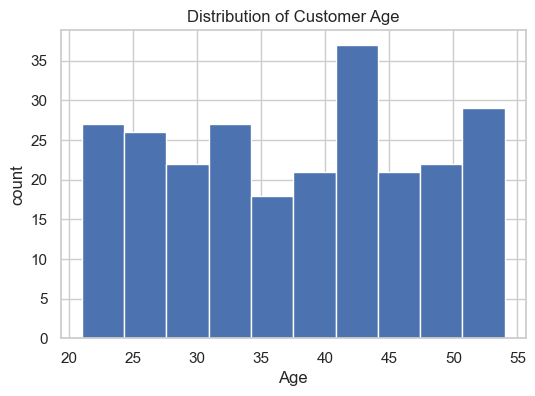

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=10)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

The histogram shows how customer ages are distributed across different age groups.
It helps identify the most common age range and detect any skewness in age distribution.

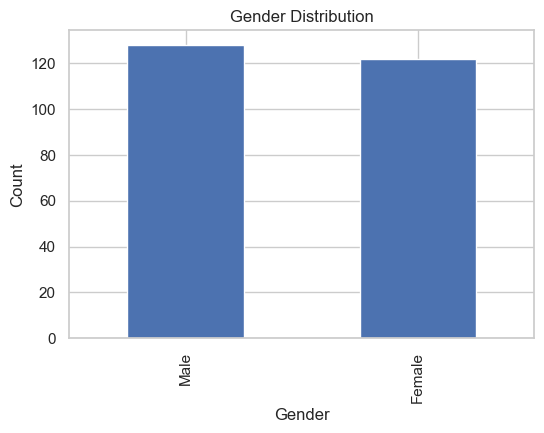

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

The bar chart represents the count of customers by gender.
It helps understand the gender composition of the customer base.

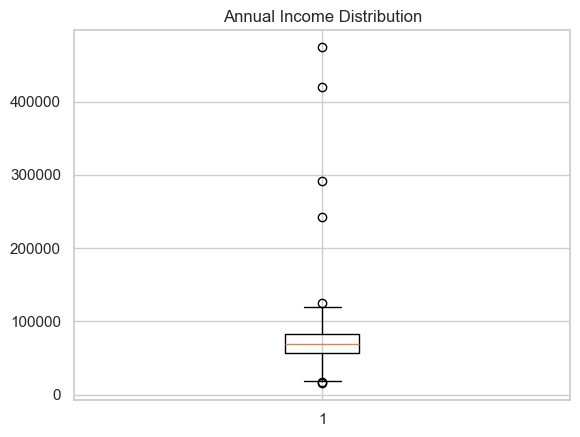

In [9]:
plt.figure()
plt.boxplot(df['AnnualIncome'].dropna())
plt.title("Annual Income Distribution")
plt.show()

The box plot compares spending behavior across genders.
It highlights differences in median spending score and shows any outliers.

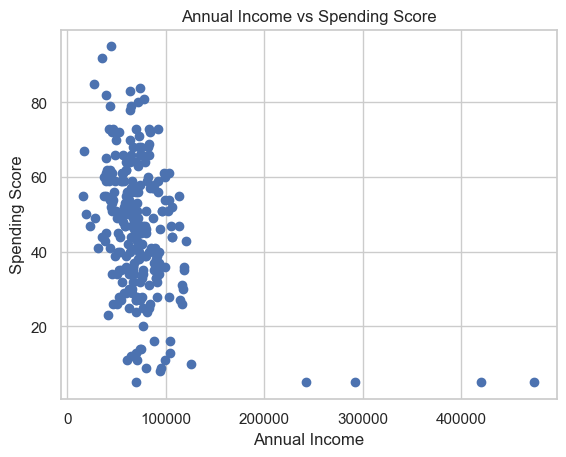

In [10]:
plt.figure()
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

Customers with higher income do not always spend more. Spending behavior varies across income levels.

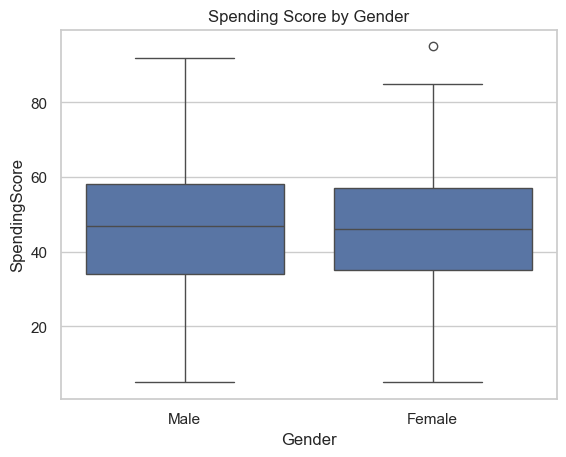

In [11]:
plt.figure()
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title("Spending Score by Gender")
plt.show()

The box plot summarizes income distribution and identifies extreme values (outliers).
It provides a clear view of median income and overall spread.

In [12]:
corr = df.corr(numeric_only=True)
corr

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
CustomerID,1.000000,-0.038170,-0.039180,0.070869,-0.018877,-0.077040,-0.029642,0.023180,-0.034412
Age,-0.038170,1.000000,-0.051429,-0.006943,0.975242,0.103053,-0.033532,-0.051190,0.092891
AnnualIncome,-0.039180,-0.051429,1.000000,-0.384127,-0.054300,-0.036673,0.096734,-0.114378,-0.016602
SpendingScore,0.070869,-0.006943,-0.384127,1.000000,-0.017487,0.009792,-0.072441,0.057686,0.032737
YearsEmployed,-0.018877,0.975242,-0.054300,-0.017487,1.000000,0.073113,-0.052168,-0.050904,0.114464
PurchaseFrequency,-0.077040,0.103053,-0.036673,0.009792,0.073113,1.000000,-0.041362,0.084121,-0.068246
OnlineVisitsPerMonth,-0.029642,-0.033532,0.096734,-0.072441,-0.052168,-0.041362,1.000000,-0.071400,0.010528
ReturnedItems,0.023180,-0.051190,-0.114378,0.057686,-0.050904,0.084121,-0.071400,1.000000,0.016208
LastPurchaseAmount,-0.034412,0.092891,-0.016602,0.032737,0.114464,-0.068246,0.010528,0.016208,1.000000


The correlation matrix shows the strength and direction of relationships between numerical variables.
Values closer to +1 or -1 indicate strong relationships, while values near 0 indicate weak relationships.

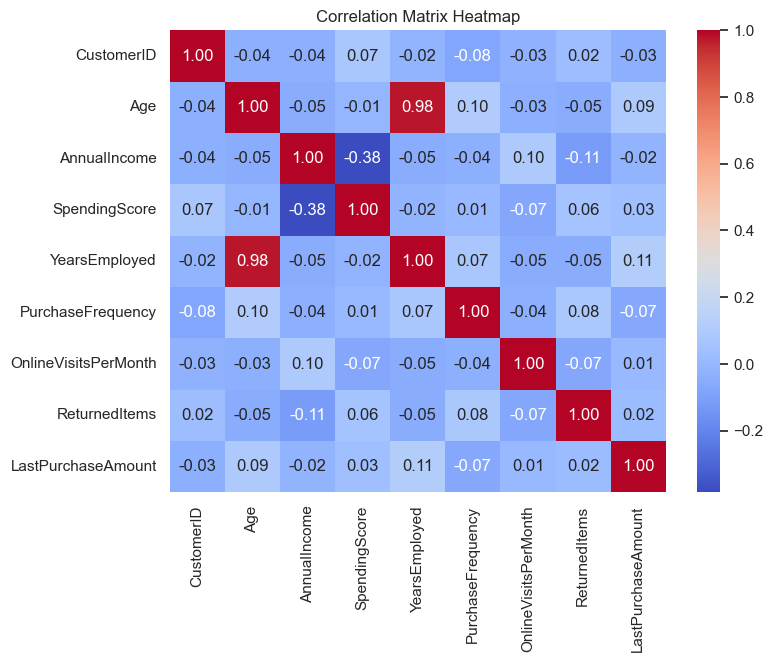

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap visually represents correlations between multiple variables using color intensity.
It helps quickly identify strong positive or negative relationships in the dataset.